In [28]:
#   !pip install numpy

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv




In [30]:

#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [31]:
print(target_tso)

[24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


In [35]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue

#   testS3ExpP50_25_all.csv

#   scalar,J_Network.server_0,completedJob:mean
#   target_tso = ["25"]
    
r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

mean :  2158.6705381035  ; repetitions_counter :  0
mean :  2262.3517663331  ; repetitions_counter :  1
mean :  2280.5449731429  ; repetitions_counter :  2
mean :  2135.4260196759  ; repetitions_counter :  3
mean :  2269.8002036097  ; repetitions_counter :  4
mean :  2020.3432465517  ; repetitions_counter :  5
mean :  2362.0875272727  ; repetitions_counter :  6
mean :  2232.3910813887  ; repetitions_counter :  7
mean :  2216.1191962134  ; repetitions_counter :  8
mean :  2245.9867845714  ; repetitions_counter :  9
mean :  2420.1298172293  ; repetitions_counter :  10
mean :  2331.6452581717  ; repetitions_counter :  11
mean :  2132.6614510369  ; repetitions_counter :  12
mean :  2223.9347299881  ; repetitions_counter :  13
mean :  2376.9096907499  ; repetitions_counter :  14
mean :  2243.6066767972  ; repetitions_counter :  15
mean :  2116.175849046  ; repetitions_counter :  16
mean :  2189.3179002347  ; repetitions_counter :  17
mean :  2485.0694657688  ; repetitions_counter :  18
mean

In [ ]:
#   import pickle

In [ ]:
#   with open('./saving', 'wb') as file_pi:
#       pickle.dump(jqTime_all_tsos, file_pi)


In [ ]:
#   with open('./saving', "rb") as file_pi:
#       jqTime_all_tsos = pickle.load(file_pi)
    

In [57]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

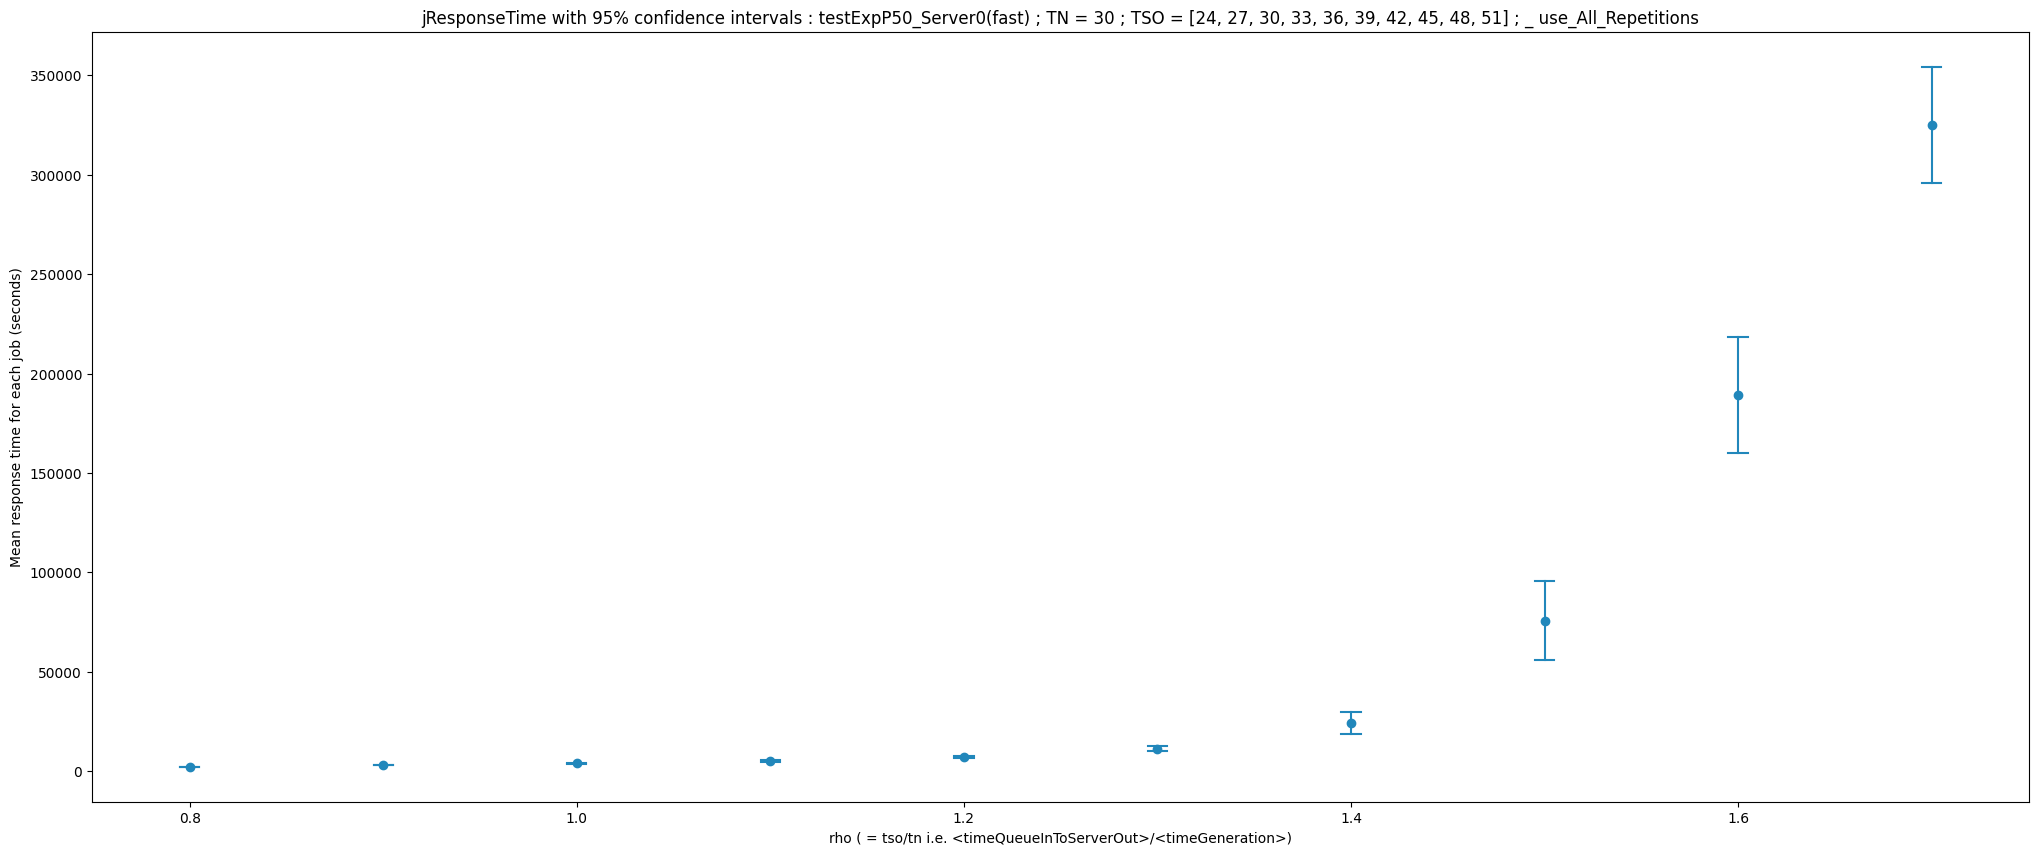

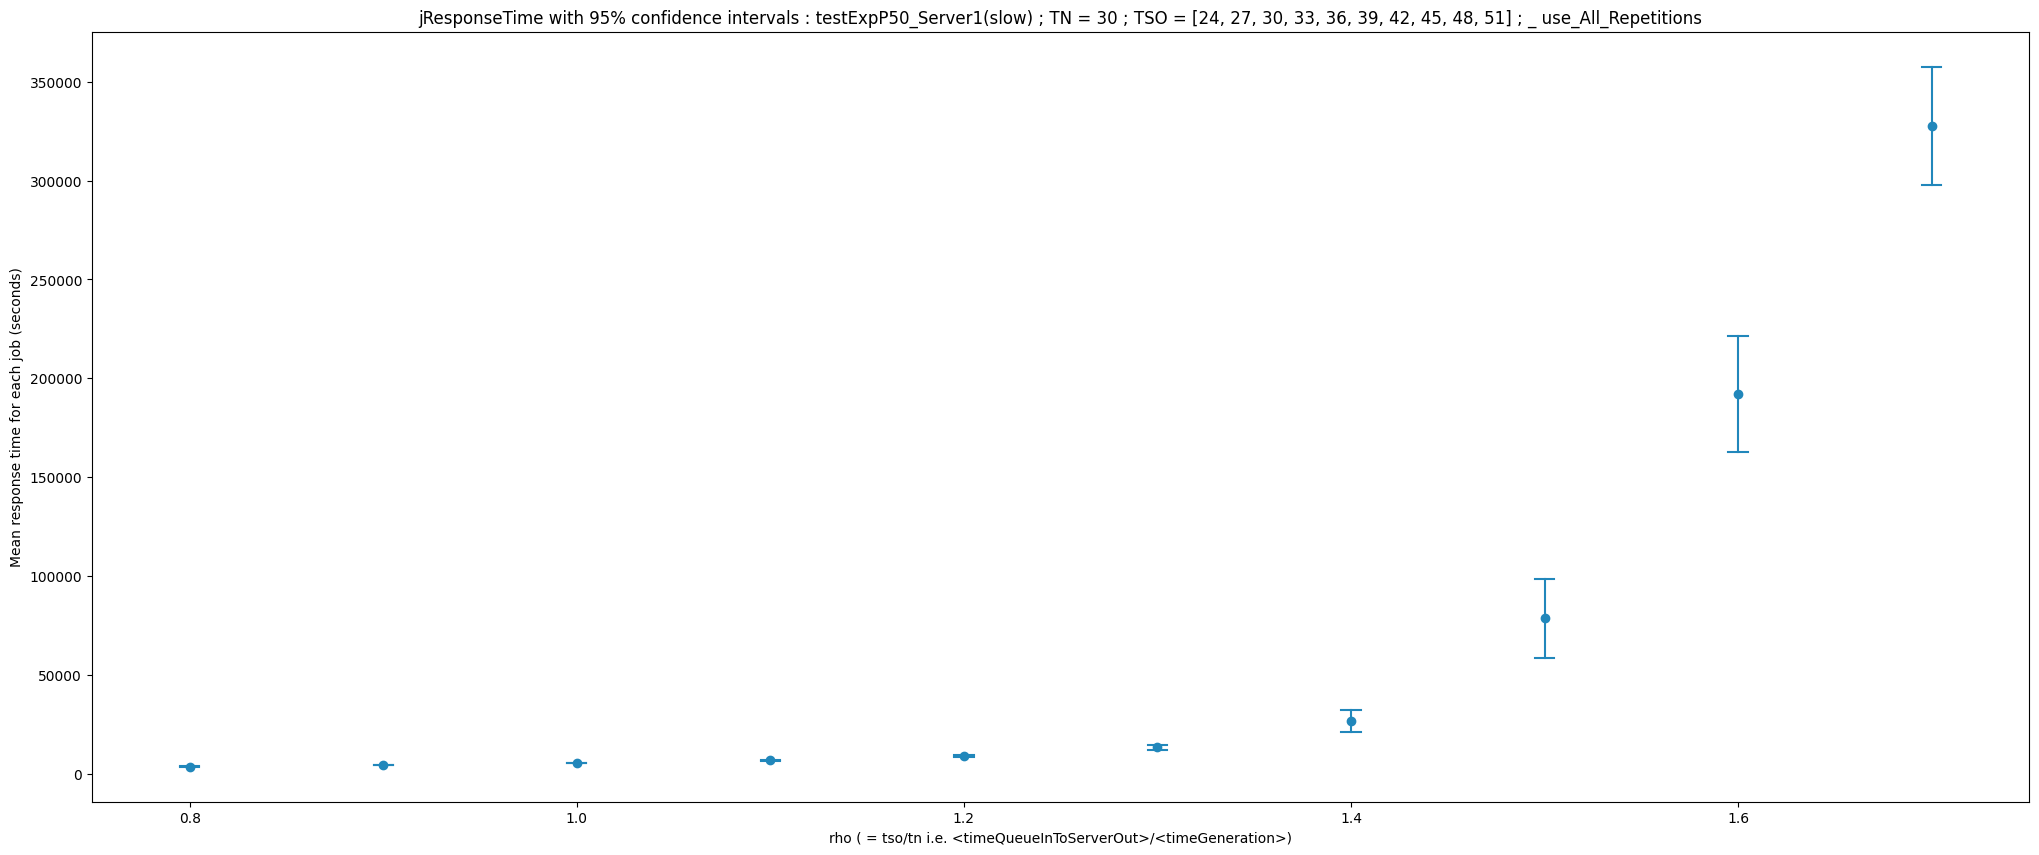

In [58]:
#	we studying completed job mean time !
#	#	r1 = "scalar"
#	#	r2 = "J_Network.server_"
#	#	r3 = "completedJob:mean"

plot_dir = f'../images/plots' 

for srvn in range(0, len(server_names)):
	plt.rcParams["figure.figsize"] = (25, 10)
	for tso_this_iter in range(0, len(target_tso), 1) :
		this_tso_averages = general_array[srvn][tso_this_iter]
		#	print(this_tso_averages)
		#	print("tipo di this_tso_averages : ", type(this_tso_averages))
		#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
		#	print("tipo di target_tn : ", type(target_tn))
		#	#	tipo di this_tso_averages :  <class 'list'>
		#	#	tipo di this_tso_averages[0] :  <class 'float'>
		#	#	tipo di target_tn :  <class 'float'>
		this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
		#	print("this_mean : ", this_mean)
		#	print(this_conf_int)

	#	rho = np.linspace(0.05, 2, 100)
	#	rho = rho 
	#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
	#	plt.legend(loc="upper left")
		
	extras = ["fast", "slow"]
	name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
	if use_all == True: 
		plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
        

	plt.ylabel("Mean response time for each job (seconds)")
	plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
     
	save = False
	if save == True:
		if use_all == True: 
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
		else :
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
	
	plt.show()



